### 제품 벡터화

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# 파일 불러오기
file_path = "C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_product_clustering.csv"
data = pd.read_csv(file_path)

# 성분 리스트를 그대로 유지하면서 공백으로 분리하여 하나의 문자열로 변환
corpus = data['formatted ingredients'].apply(lambda x: ' '.join(x.replace("-", "and").split(", ")))

# corpus 출력
print(corpus)

# CountVectorizer를 사용하여 벡터화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# 벡터화된 데이터 확인
print(X.toarray())

# X.toarray()에서 1의 존재 여부 확인
has_ones = np.any(X.toarray() == 1, axis=1)

# 결과 출력
print(has_ones)

# 벡터화된 데이터를 DataFrame으로 변환하고 열 이름 설정
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 'product name' 열을 DataFrame에 추가
df['product name'] = data['product name']

# 열의 순서를 변경하여 'product name' 열이 앞에 오도록 조정
df = df[['product name'] + df.columns[:-1].tolist()]

# 저장할 파일 경로 지정
output_file_path = "C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_array_clustering.csv"

# DataFrame을 CSV 파일로 저장
df.to_csv(output_file_path, index=False)


0       ['water' 'glycerin' 'vegetableandoil' 'simmond...
1       ['water' 'polyvinylandalcohol' 'alcoholanddena...
2       ['water' 'glycerin' 'cetearylandalcohol' 'dica...
3       ['water' 'propanediol' 'butyleneandglycol' '1a...
4       ['water' 'aloeandbarbadensisandleafandjuice' '...
                              ...                        
5752    ['water' 'niacinamide' 'tranexamicandacid' 'et...
5753    ['water' 'panaxandginsengandrootandextract' 'p...
5754    ['water' 'dimethicone' 'isononylandisononanoat...
5755    ['butylandmethoxydibenzoylmethane' 'ethylhexyl...
5756    ['methoxymethylbutanol' 'ethylandascorbicandac...
Name: formatted ingredients, Length: 5757, dtype: object
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[ True  True  True ...  True  True  True]


### 벡터화된 데이터 시각화

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_array_clustering.csv")

# 'product name' 열과 첫 번째 행 삭제
X = data.drop(data.columns[0], axis=1)
X_df = pd.DataFrame(X)


# 데이터프레임을 CSV 파일로 저장
X_df.to_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_X_data.csv", index=False)

# CSV 파일을 불러와서 첫 번째 행을 제거하고 데이터프레임으로 저장
X_data = pd.read_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_X_data.csv", skiprows=[0])

# 새로운 CSV 파일로 저장
X_data.to_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_X_data_fin.csv", index=False)

# # PCA를 사용하여 2차원으로 차원 축소
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# print(pca.explained_variance_ratio_)

# # 2차원으로 축소된 데이터를 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization of Vectorized Data')
# plt.show()


### 여기

[0.03401553 0.02334846]


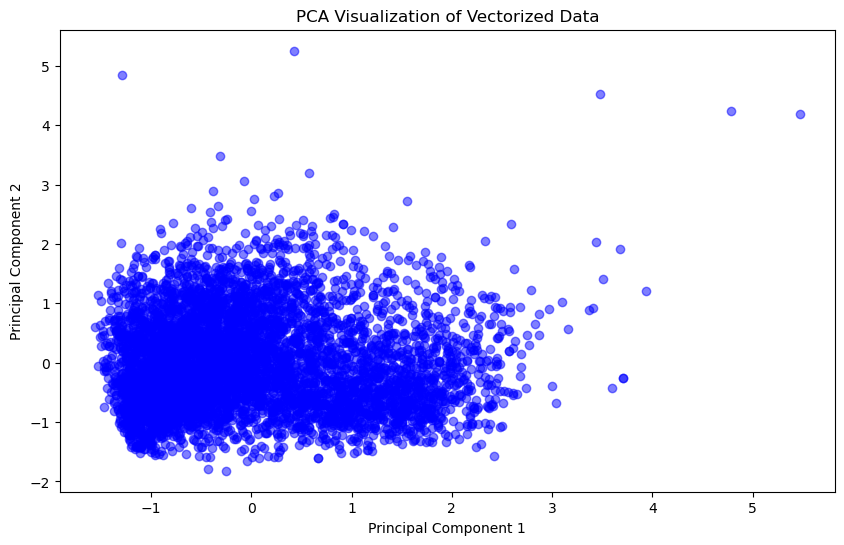

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\new_X_data_fin.csv")

X = data
X_df = pd.DataFrame(X)


# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

# 2차원으로 축소된 데이터를 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Vectorized Data')
plt.show()

### K평균 군집 개수 찾기

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

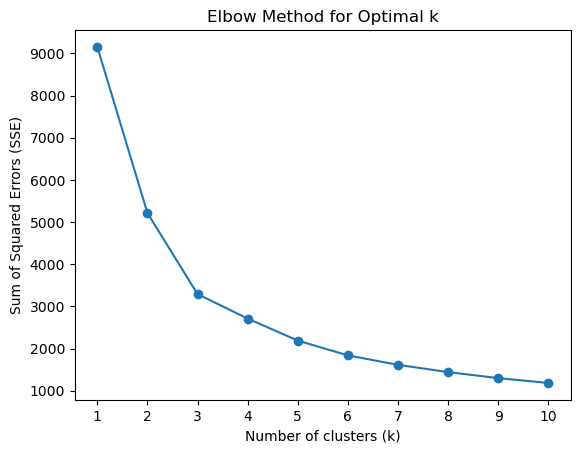

In [4]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

k_range = range(1,11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()



##### k 개수가 3에서 완만하게 변하므로 군집을 3개로 설정함(여기)

## 모델 생성 및 학습 

In [5]:
import pickle

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3, n_init=20, max_iter=200, algorithm='lloyd', random_state=42)
                 
# 생성한 모델로 데이터를 학습시킴
clust_model.fit(X_pca) 

# 모델을 파일에 저장
with open('kms_model.pkl', 'wb') as f:
    pickle.dump(clust_model, f)

# 각 데이터포인트가 속한 군집의 레이블
model_label = clust_model.labels_
print(model_label[:20]) # 첫 20개 대상

# 각 클러스터 안에 있는 데이터 개수 계산
cluster_counts = {}
for label in set(model_label):
    cluster_counts[label] = sum(model_label == label)

print("각 클러스터 안에 있는 데이터 개수:")
for label, count in cluster_counts.items():
    print(f"클러스터 {label}: {count}개")

# 데이터프레임의 행(row)과 열(column)로 전체 데이터의 개수 확인
total_rows, total_cols = data.shape
print("전체 데이터의 개수:", total_rows)


[2 2 1 0 2 1 1 0 2 1 0 1 0 1 1 1 1 2 0 0]
각 클러스터 안에 있는 데이터 개수:
클러스터 0: 2470개
클러스터 1: 1563개
클러스터 2: 1723개
전체 데이터의 개수: 5756


## 결과 시각화

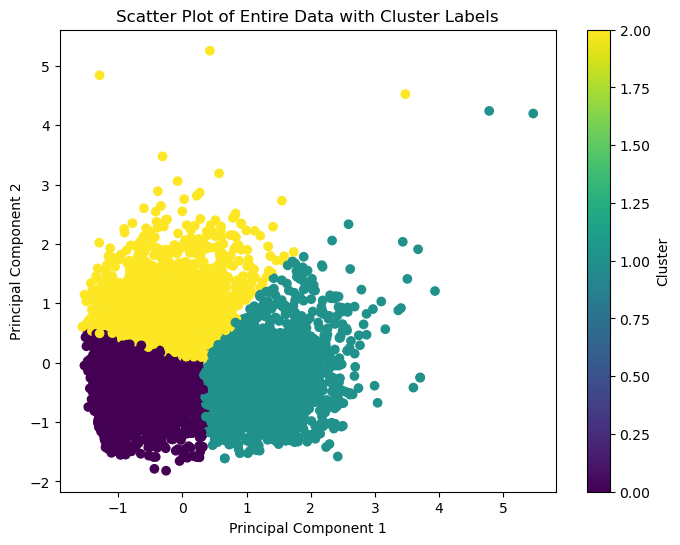

In [6]:
import matplotlib.pyplot as plt


# 산점도 그리기
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model_label, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Entire Data with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()


## 군집 평가
 #### 1. 전체 실루엣 계수가 1에 가깝도록
 #### 2. 개별 군집의 실루엣 스코어가 전체 실루엣 스코어와 크게 다르지 않도록

In [7]:
from sklearn.metrics import silhouette_score

# 전체 실루엣 계수 계산
silhouette_avg = silhouette_score(X_pca, model_label)
print("실루엣 계수:", silhouette_avg)

실루엣 계수: 0.414811914571545


In [8]:
from sklearn.metrics import silhouette_samples

# Calculate silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_pca, model_label)

# 각 군집의 실루엣 스코어 평균 계산
for cluster_label in set(model_label):
    cluster_silhouette_values = sample_silhouette_values[model_label == cluster_label]
    cluster_mean_silhouette = cluster_silhouette_values.mean()
    print(f"Cluster {cluster_label}의 실루엣 스코어 평균: {cluster_mean_silhouette}")



Cluster 0의 실루엣 스코어 평균: 0.46870909751052503
Cluster 1의 실루엣 스코어 평균: 0.4121577714513545
Cluster 2의 실루엣 스코어 평균: 0.3399554919584149


## 새로운 데이터를 군집에 할당

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import pickle
import pandas as pd
import numpy as np

# 새 데이터
new_data = ['water', 'glycerin', 'vegetable-oil', 'simmondsia-chinensis-seed-oil', 'isosorbide-dicaprylate', 'cetearyl-alcohol', 'dicetyl-phosphate', 'butyrospermum-parkii-butter', 'vitis-vinifera-leaf-extract', 'vitis-vinifera-fruit-extract', 'vitis-vinifera-seed-oil', 'pistacia-lentiscus-gum', 'olea-europaea-fruit-oil', 'hydrolyzed-sodium-hyaluronate', 'propolis-extract', 'panthenol', 'salvia-sclarea-oil', 'citrus-aurantium-amara-flower-oil', 'peg-40-hydrogenated-castor-oil', 'rosa-damascena-flower-oil', 'pogostemon-cablin-leaf-oil', 'caprylic-capric-triglyceride', 'lecithin', 'hydroxypropyl-cyclodextrin', 'sclerotium-gum', 'tocopheryl-acetate', 'ceteth-20-phosphate', 'sodium-acrylates-copolymer', 'methylglucoside-phosphate', 'copper-lysinate-prolinate', 'cetyl-palmitate', 'tetrahexyldecyl-ascorbate', 'disodium-edta', 'citronellyl-methylcrotonate', 'dehydroacetic-acid', 'sodium-hydroxide', 'parfum', 'benzyl-alcohol', 'hexyl-cinnamal', 'limonene', 'alpha-isomethyl-ionone', 'citronellol', 'benzyl-salicylate', 'geraniol', 'linalool', 'hydroxycitronellal']

# 모델을 파일에서 불러오기
with open('kms_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
# Initialize CountVectorizer
vectorizer = CountVectorizer()
fit_X = vectorizer.fit_transform(X)

# 새 데이터를 하나의 문자열 표현으로 변환
new_corpus = ' '.join([ingredient.replace("-", "and") for ingredient in new_data])

# CountVectorizer를 사용하여 새 데이터를 벡터화
new_vectorized = vectorizer.transform([new_corpus])

data_columns = X.shape[1]
print("data:",data_columns)
new_columns = new_vectorized.shape[1]
print("new:",new_columns)

if new_columns < data_columns:
    # 새로운 데이터의 열이 더 적은 경우, 빈 셀을 0으로 채우기
    extra_columns = np.zeros(data_columns - new_columns)
    new_vectorized = np.hstack((new_vectorized.toarray(), extra_columns.reshape(1, -1)))
elif new_columns > data_columns:
    # 새로운 데이터의 열이 더 많은 경우, 기존 데이터의 열의 개수와 동일하게 자르기
    new_vectorized = new_vectorized[:, :data_columns]

    
data_columns = X.shape[1]
print("data:",data_columns)
new_fit_columns = new_vectorized.shape[1]
print("new:",new_fit_columns)

X_array = X.values
combined_data = np.vstack((X_array, new_vectorized))

# # combined_data를 DataFrame으로 변환
# combined_df = pd.DataFrame(combined_data)

# # 데이터프레임을 CSV 파일로 저장
# combined_df.to_csv("C:\\Users\\Lenovo\\PycharmProjects\\pythonProject\\combined_data.csv", index=False)

# TruncatedSVD를 사용하여 2차원으로 차원 축소
svd = TruncatedSVD(n_components=2)
new_svd = svd.fit_transform(combined_data)

# 새로운 벡터화된 데이터에 대한 군집 레이블을 예측
predicted_cluster = loaded_model.predict(new_svd)

# 새로운 데이터의 인덱스
new_data_index = combined_data.shape[0] - 1

pred_new_cluster = predicted_cluster[new_data_index]

# 예측된 군집 레이블을 출력
print("예측된 군집 레이블:", pred_new_cluster)



data: 6992
new: 6936
data: 6992
new: 6992
예측된 군집 레이블: 0


## 시각화

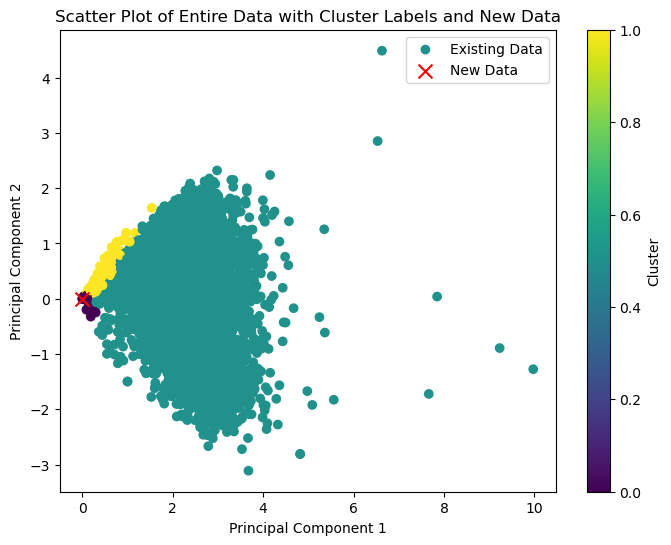

In [10]:
import matplotlib.pyplot as plt

# 각 데이터포인트가 속한 군집의 레이블
new_model_label = loaded_model.predict(new_svd)

# 산점도 그리기
plt.figure(figsize=(8, 6))

# 전체 데이터의 산점도 그리기
plt.scatter(new_svd[:, 0], new_svd[:, 1], c=new_model_label, cmap='viridis', label='Existing Data')
# 새로운 데이터 포인트 표시
plt.scatter(new_svd[-1, 0], new_svd[-1, 1], c='red', marker='x', s=100, label='New Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Entire Data with Cluster Labels and New Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import silhouette_score

# 전체 실루엣 계수 계산
silhouette_avg = silhouette_score(new_svd, new_model_label)
print("실루엣 계수:", silhouette_avg)

실루엣 계수: 0.20307514856569533


### 거리순 10개 찾기

In [26]:
print(np.where(loaded_model.labels_ == pred_new_cluster))
print(new_data_index)

(array([   5,   10,   14, ..., 9992, 9993, 9997], dtype=int64),)
10000


In [12]:
from sklearn.metrics.pairwise import euclidean_distances

new_data_point = combined_data[new_data_index]

# 해당 클러스터에 속한 데이터포인트 인덱스 가져오기
cluster_indices = np.where(loaded_model.labels_ == pred_new_cluster)

# 클러스터 내의 데이터포인트들을 2차원 배열로 변환
cluster_points = combined_data[cluster_indices]

# 클러스터 내의 데이터포인트와 새로운 데이터 사이의 유클리드 거리 계산
distances = euclidean_distances(new_data_point.reshape(1, -1), cluster_points)

# 거리를 기준으로 가장 가까운 데이터포인트 10개의 인덱스를 찾기
closest_indices = cluster_indices[0][np.argsort(distances.flatten())[:10]]

print("가장 가까운 데이터포인트 10개의 인덱스:", closest_indices)




가장 가까운 데이터포인트 10개의 인덱스: [3795  353 1176 1838 1931 2884 3089 3387 3680 2417]


In [28]:
inc_closest_indices = closest_indices + 1
print(inc_closest_indices)


[6611 4609 4421 4625  565 4060 7795 2202 1983 9697]
